In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d


In [2]:
class GraphMaker:
    def __init__(self):
        self.types = ['gru', 'lstm', 'rnn_relu', 'rnn_sigmoid', 'rnn_tanh']
        self.FirstLayerNodes = np.arange(50, 501, 50)
        self.AttentionNodes = np.arange(50, 1001, 50)
    
    def get_graph(self, type, FirstLayerNodes, AttentionNodes):
        log_file = 'data/{}_{}_{}.log'.format(type, FirstLayerNodes, AttentionNodes)

        with open(log_file, 'r') as f:
            lines = f.readlines()

        train_loss = []
        train_acc = []
        val_loss = []
        val_acc = []

        for line in lines:
            if "loss" in line and "ETA" in line:
                train_loss.append(float(line.split()[7][:6]))
                train_acc.append(float(line.split()[10][:6]))

        #print(train_loss)

        # Smooth the curves for better visualization
        train_loss = gaussian_filter1d(train_loss, 6)
        train_acc = gaussian_filter1d(train_acc, 10)
        val_loss = gaussian_filter1d(val_loss, 6)
        val_acc = gaussian_filter1d(val_acc, 10)

        plt.subplot(1,2,1)
        plt.plot(train_loss, 'b', label='Training loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')

        plt.subplot(1,2,2)
        plt.plot(train_acc, 'b', label='Training accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')

        plt.tight_layout()

        folder = ''
        if type == "gru": folder = "GRU"
        elif type == "lstm": folder = "LSTM"
        else: folder = "RNN"
        plt.savefig('Images/log_images/{}/{}_{}_{}.png'.format(folder, type, FirstLayerNodes, AttentionNodes))
        plt.close()

    def save_images(self):
        for type in self.types:
            for FirstLayerNodes in self.FirstLayerNodes:
                for AttentionNodes in self.AttentionNodes:
                    self.get_graph(type, FirstLayerNodes, AttentionNodes)
    
    def checker(self, type):
        for FirstLayerNodes in self.FirstLayerNodes:
            for AttentionNodes in self.AttentionNodes:
                self.get_graph(type, FirstLayerNodes, AttentionNodes)
        

        

In [3]:
gm = GraphMaker()
gm.save_images()

[2.1722, 2.0491, 2.0059, 1.9698, 1.9339, 1.9073, 1.8796, 1.859, 1.8505, 1.8449, 1.8274, 1.8159, 1.8054, 1.7947, 1.7847, 1.7762, 1.7662, 1.7553, 1.745, 1.7329, 1.724, 1.715, 1.7054, 1.6962, 1.6889, 1.4789, 1.4846, 1.4715, 1.4629, 1.468, 1.4673, 1.4678, 1.4618, 1.4626, 1.4649, 1.4747, 1.4676, 1.4692, 1.4683, 1.4638, 1.4612, 1.4593, 1.4563, 1.458, 1.4591, 1.4565, 1.455, 1.4534, 1.4494, 1.4464, 1.3951, 1.4224, 1.4172, 1.4175, 1.3894, 1.3854, 1.3792, 1.3812, 1.3892, 1.3885, 1.3833, 1.3791, 1.3777, 1.3702, 1.3691, 1.3644, 1.3635, 1.362, 1.3607, 1.3571, 1.3564, 1.3518, 1.3486, 1.3454, 1.3417, 1.3177, 1.3196, 1.3108, 1.2878, 1.2858, 1.2824, 1.2852, 1.2879, 1.283, 1.2761, 1.2747, 1.2769, 1.2719, 1.275, 1.274, 1.2778, 1.2756, 1.2735, 1.2695, 1.2703, 1.2699, 1.267, 1.2623, 1.2598, 1.2589, 1.3094, 1.2488, 1.2725, 1.242, 1.2403, 1.2393, 1.2334, 1.2329, 1.2343, 1.2313, 1.2322, 1.2313, 1.2266, 1.2235, 1.2212, 1.2149, 1.2136, 1.2098, 1.2095, 1.2047, 1.2032, 1.2037, 1.2012, 1.1967, 1.1977, 1.1423, 1.13

Text(0, 0.5, 'Accuracy')

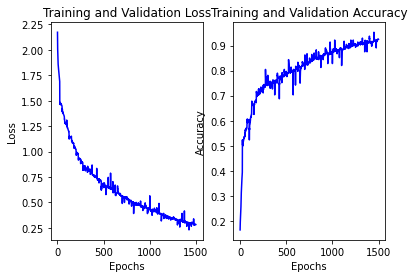

In [12]:
log_file = 'data/gru_50_50.log'

with open(log_file, 'r') as f:
    lines = f.readlines()

train_loss = []
train_acc = []
val_loss = []
val_acc = []

for line in lines:
    if "loss" in line and "ETA" in line:
        train_loss.append(float(line.split()[7][:6]))
        train_acc.append(float(line.split()[10][:6]))

print(train_loss)

plt.subplot(1,2,1)
plt.plot(train_loss, 'b', label='Training loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(train_acc, 'b', label='Training accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


In [13]:


log_file = 'data/gru_50_50.log'

with open(log_file, 'r') as f:
    lines = f.readlines()

train_loss = []
train_acc = []
val_loss = []
val_acc = []

for line in lines:
    if 'loss' in line and 'ETA' in line:
        if 'val' not in line:
            train_loss.append(float(line.split()[4]))
            train_acc.append(float(line.split()[6]))
        else:
            val_loss.append(float(line.split()[4]))
            val_acc.append(float(line.split()[6]))

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

ValueError: could not convert string to float: '2:27'

In [6]:
infile = "data/gru_50_50.log"
with open(infile) as f:
    f = f.readlines()
#print(f)
important = []
for line in f:    
    if "accuracy:" in line:
        important.append(line)
        break

print(important)

[' 1/50 [..............................] - ETA: 2:27 - loss: 2.1722 - accuracy: 0.1641\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\n']
